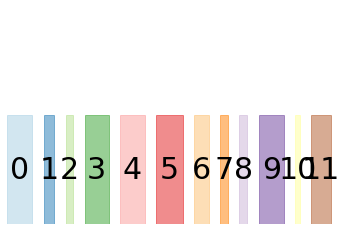

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import random
from helper_files import plot_blocks

#create number of blocks with random length
n_blocks = 12
max_length = 60
height = 0.5

blocks = [random.uniform(3, 25) for i in range(n_blocks)]
plot_blocks(blocks)

#https://arpitbhayani.me/blogs/genetic-knapsack/


[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]


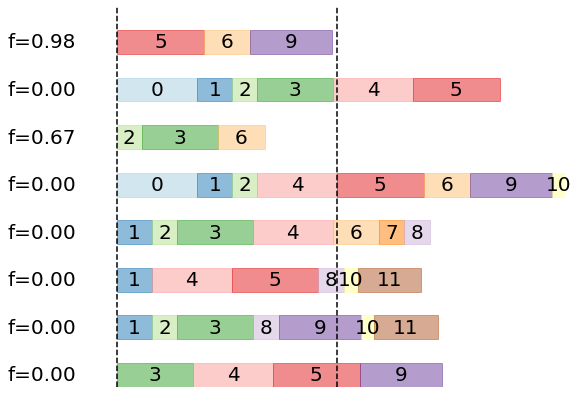

In [12]:
from helper_files import plot_population
import numpy as np

def calc_fitness(individuum):
    length = 0
    for i, chosen in enumerate(individuum):
        if chosen == 1:
            length += blocks[i]
    if length > max_length:
        return 0
    else:
        return length/max_length

def print_population(population):
    for individuum in population:
        print(individuum)


def erzeuge_population(n_individuen):
    population = []
    for i in range(n_individuen):
        individuum = [random.randint(0, 1) for j in range(len(blocks))]
        population.append(individuum)
    return population

population = erzeuge_population(n_individuen=8)
fitness = [calc_fitness(individuum) for individuum in population]

print_population(population)

#plotte population
plot_population(population, blocks, max_length, fitness, with_fitness=True)

fitness_values = []





[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]


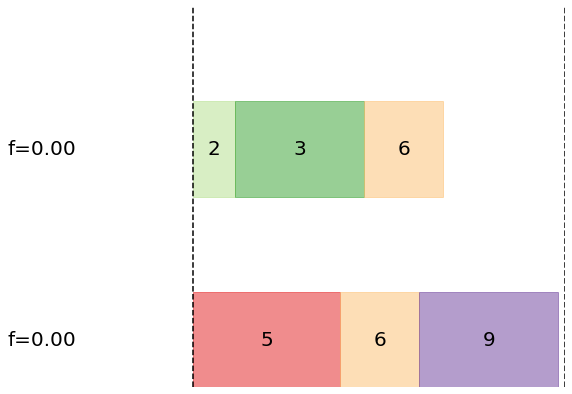

In [13]:
def select_parents(population):
    fitness = [calc_fitness(individuum) for individuum in population]
    #sort by fitness
    population = [x for _, x in sorted(zip(fitness, population), key=lambda pair: pair[0], reverse=True)]

    #choose best 2 parents
    parents = population[:2]

    return parents

parents = select_parents(population)
print_population(parents)
plot_population(parents, blocks, max_length, fitness, with_fitness=True, sort=True)

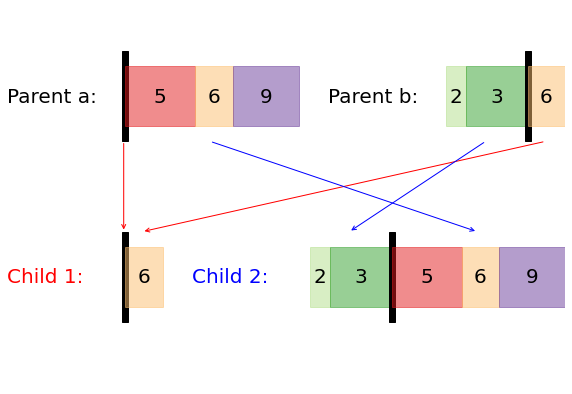

In [14]:
from helper_files import plot_cross_over

def crossover(parents):
    parent1 = parents[0]
    parent2 = parents[1]

    #choose random crossover point
    crossover_point = random.randint(1, len(parent1)-2)

    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

    return (child1, child2) , crossover_point


children, cross_point = crossover(parents)
plot_cross_over(parents, children, cross_point, blocks, max_length)

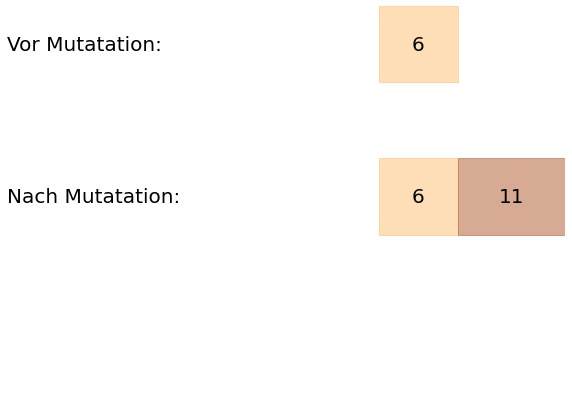

In [15]:
from helper_files import plot_mutation

def mutate(individuum, plot=False):

    individuum_save = individuum.copy()

    pos = random.randint(0, len(individuum)-1)
    individuum[pos] = 1 - individuum[pos]

    if plot:
        plot_mutation(individuum_save, individuum, blocks, height)

    return individuum


mutated = mutate(children[0], plot = True)

[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


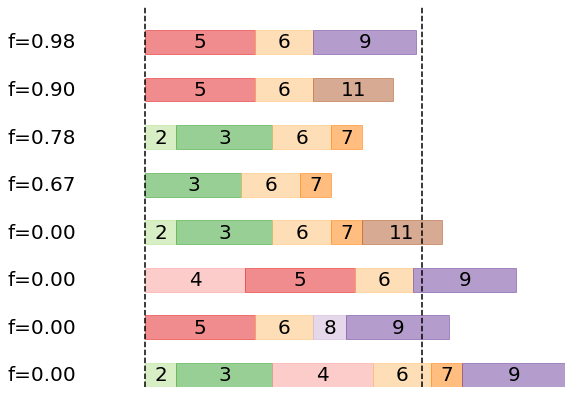

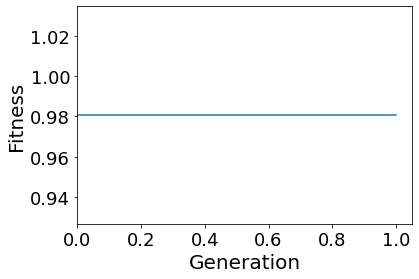

In [17]:
from helper_files import plot_fitness

def next_generation(population):
    fitness = [calc_fitness(individuum) for individuum in population]
    fitness_values.append(np.max(fitness))
    parents = select_parents(population)

    next_generation = parents
    for i in range(0, int((len(population)-len(parents))/2)):
        children, _ = crossover(parents)
        mutated_children = [mutate(child, plot = False) for child in children]
        next_generation += mutated_children

    return next_generation

population = next_generation(population)
fitness = [calc_fitness(individuum) for individuum in population]
print_population(population)
plot_population(population, blocks, max_length, fitness, with_fitness=True, sort=True)

#create new figure
plot_fitness(fitness_values)
